# BHARAT INTERN INTERNSHIP, SEPTEMPBER 2023

# DATA SCIENCE INTERNSHIP

## PROBLEM STATEMENT

### Stock Prediction : Take stock price of any company you want and predicts its price by using LSTM. Use only Jupyter notebook code.

## SOLUTION

## AUTHOR : ARITRA BAG

#### MOUNTING DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### IMPORTING LIBRARIES

In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import datetime
from datetime import date,datetime
import keras, keras_tuner
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import hyperparameters

#### IMPORTING THE DATASET : NVIDIA STOCK PRICE (SEPTEMBER 19, 2022 - SEPTEMBER 19, 2023)

In [ ]:
raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects for Show/Bharat Intern/Stock Price/NVDA.csv')
raw_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-19,130.119995,134.630005,130.100006,133.820007,133.738205,56968500
1,2022-09-20,132.149994,134.830002,130.570007,131.759995,131.679459,52481800
2,2022-09-21,132.130005,140.309998,131.100006,132.610001,132.528931,80767900
3,2022-09-22,130.699997,131.490005,124.279999,125.610001,125.533211,75916200
4,2022-09-23,124.199997,126.110001,122.570000,125.160004,125.083488,66330900
5,2022-09-26,124.910004,126.589996,122.139999,122.279999,122.205238,54734300
6,2022-09-27,125.070000,127.360001,122.580002,124.129997,124.054108,55385400
7,2022-09-28,124.099998,128.229996,123.540001,127.360001,127.282143,54241400
8,2022-09-29,124.480003,125.000000,119.459999,122.199997,122.125298,53276300
9,2022-09-30,120.870003,126.330002,120.750000,121.389999,121.315788,56563800


#### REMOVING NON-ESSENTIAL DATA AND COVERTING INTO A PROPER DTAE-TIME FORMAT

In [ ]:
data=raw_data.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)
data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')
data.head(10)

,Date,Open
0,2022-09-19,130.119995
1,2022-09-20,132.149994
2,2022-09-21,132.130005
3,2022-09-22,130.699997
4,2022-09-23,124.199997
5,2022-09-26,124.910004
6,2022-09-27,125.070000
7,2022-09-28,124.099998
8,2022-09-29,124.480003
9,2022-09-30,120.870003


#### VISUALIZATION OF THE STOCK PRICE

<Axes: title={'center': 'Nvidia Stock Price Between SEPTEMBER 19, 2022 and SEPTEMBER 19, 2023 '}, xlabel='Date', ylabel='Stock Price in $'>

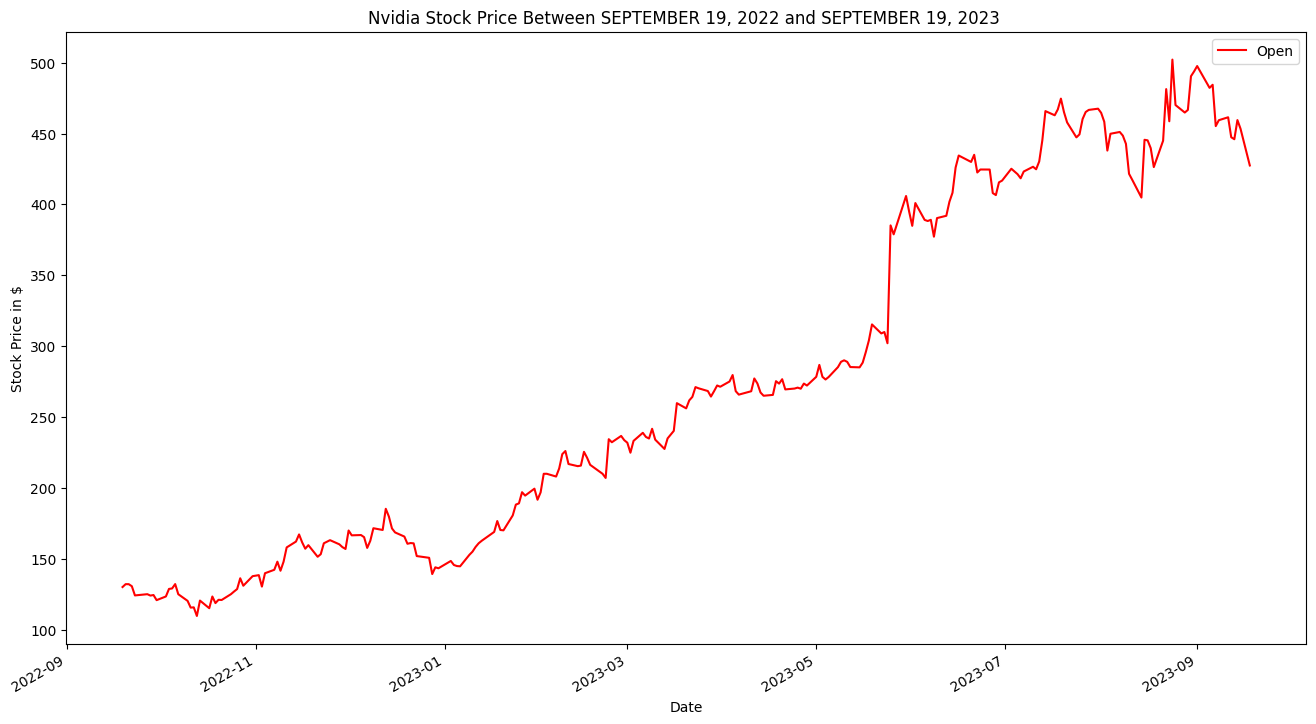

In [ ]:
data.plot('Date','Open', kind = 'line', figsize = (16,9), xlabel = 'Date', ylabel = 'Stock Price in $', title = 'Nvidia Stock Price Between SEPTEMBER 19, 2022 and SEPTEMBER 19, 2023 ', color = 'Red')

#### GETTING THE STOCK PRICE VALUES

In [ ]:
stock_price_raw = np.array(data.iloc[:,1 : 2].values, dtype = 'float64')

#### DATA SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
stock_price = (stock_price_raw).reshape(-1,1)
sc = MinMaxScaler(feature_range = (0,1)).fit(stock_price)
stock_price_scaled = sc.transform(stock_price)

#### CREATING A FUNCTION FOR DATA TRAIN - TEST SPLIT

In [ ]:
def STOCKS_INPUT_DATA (data, test_percent):
    limit = int(((100 - test_percent)/100)*len(data))
    data_train = data[:limit]
    data_test = data[limit : len(data)]
    return data_train, data_test

#### CREATING A FUNCTION TO GET THE NUMBER OF LOOK BACK VALUES

In [ ]:
def STOCKS_LOOK_BACK (data_train,units):
    x_train = []
    y_train = []
    for i in range (int(units) , len(data_train)):
        x_train.append(data_train[i- int(units): i, 0])
        y_train.append(data_train[i, 0])
    x_train = np.array(x_train, dtype = 'float64')
    y_train = np.array(y_train, dtype = 'float64')
    x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
    return x_train, y_train

#### CREATING A FUNCTION TO GET THE BEST FIT RNN

In [ ]:
def STOCKS_RNN(x_train, y_train, half_layers, max_units_per_LSTM, max_dropout_range, max_trials, epochs, batch_size):
    def stocks_rnn(hp):
        stocks_rnn = Sequential ()
        stocks_rnn.add(LSTM(units = hp.Int('Input_LSTM_Units', min_value = 1, max_value = int(max_units_per_LSTM), step =1), return_sequences = True, input_shape = (x_train.shape[1], 1)))
        stocks_rnn.add(Dropout(rate = hp.Float('Input_Dropout',min_value = 0.1, max_value = float(max_dropout_range), step =0.05)))
        for l in range (0,int(layers)-3):
            LSTM_layer_units = str ('Hidden_LSTM_Layer_'+str(l+1)+'_units')
            Dropout_value = str('Hidden_Dropout_Layer_'+str(l+1)+'_value')
            stocks_rnn.add(LSTM(units = hp.Int(str(LSTM_layer_units), min_value = 1, max_value = int(max_units_per_LSTM), step =1), return_sequences = True))
            stocks_rnn.add(Dropout(rate = hp.Float(str(Dropout_value),min_value = 0.1, max_value = float(max_dropout_range), step =0.05)))
        stocks_rnn.add(LSTM(units = hp.Int('Final_LSTM_Layer_Units', min_value = 1, max_value = int(max_units_per_LSTM), step =1), return_sequences = False))
        stocks_rnn.add(Dropout(rate = hp.Float('Final_Dropout_Value',min_value = 0.1, max_value = float(max_dropout_range), step =0.05)))
        stocks_rnn.add(Dense(1))
        stocks_rnn.compile(optimizer = keras.optimizers.Adam(hp.Float('learning_Rate',min_value = 0.001, max_value = 0.01, step =0.00025)), loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
        return stocks_rnn
    find_model = RandomSearch(stocks_rnn, keras_tuner.Objective('loss', direction = 'min'), max_trials = int(max_trials), directory = 'output', project_name = 'STOCK_PRICE')
    find_model.search(x_train, y_train, epochs = int(epochs), batch_size = int(batch_size))
    best_model = find_model.get_best_models(1)[0]
    best_parameters = find_model.get_best_hyperparameters(1)[0]
    return best_model,best_parameters

#### FINDING THE BEST FIT

In [ ]:
test_size_percent = 10
look_back_units = 4
half_of_total_layers = 5
max_lstm_units = 1024
max_dropout =0.9
trials = 100
batch = 10

In [ ]:
stocks_train, stocks_test = STOCKS_INPUT_DATA (stock_price_scaled,  test_percent = test_size_percent)
x_train_out, y_train_out = STOCKS_LOOK_BACK (stocks_train, units = look_back_units)
best_model, best_parameters = STOCKS_RNN(x_train_out, y_train_out, half_layers = half_of_total_layers, max_units_per_LSTM = max_lstm_units, max_dropout_range = max_dropout, max_trials = trials, epochs = 5, batch_size = batch )

Trial 100 Complete [00h 00m 20s]
loss: 0.09029136598110199

Best loss So Far: 0.002426170976832509
Total elapsed time: 00h 30m 12s


#### FINDING THE BEST MODEL AND BEST HYPERPARAMETERS

{'Input_LSTM_Units': 149, 'Input_Dropout': 0.2, 'Hidden_LSTM_Layer_1_units': 912, 'Hidden_Dropout_Layer_1_value': 0.2, 'Hidden_LSTM_Layer_2_units': 759, 'Hidden_Dropout_Layer_2_value': 0.1, 'Final_LSTM_Layer_Units': 353, 'Final_Dropout_Value': 0.15000000000000002, 'learning_Rate': 0.0025}
<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7ff66f34ed70>>


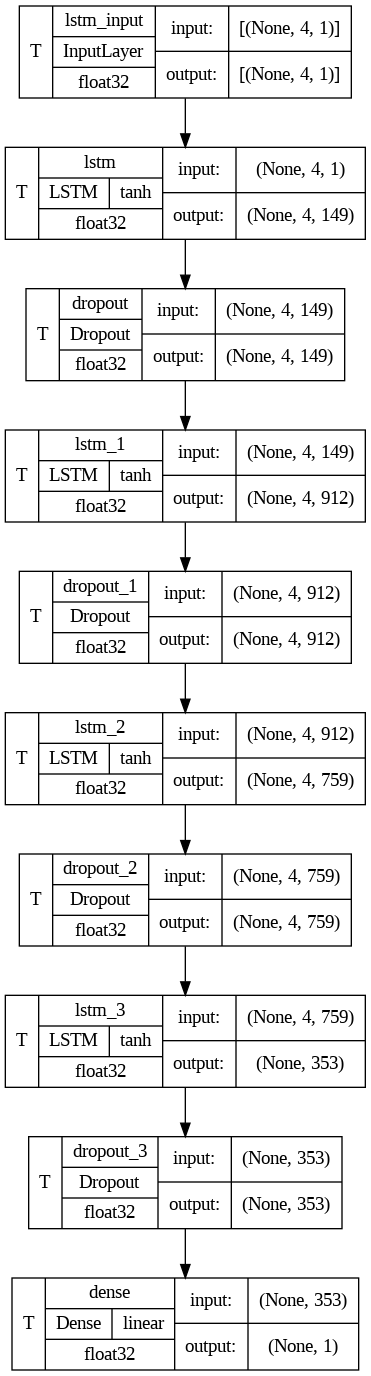

In [ ]:
print(best_parameters.values)
print(best_model.summary)
model_name='/content/drive/MyDrive/Colab Notebooks/Projects for Show/Bharat Intern/Stock Price/nvidia_stock_price_predictor.png'
keras.utils.plot_model(best_model, to_file=model_name, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, dpi=96, show_layer_activations=True, show_trainable=True, rankdir='TB')

#### RECREATING THE MODEL FROM SCRATCH

In [ ]:
test_size_percent = 10
look_back_units = 4
half_of_total_layers = 5
max_lstm_units = 1024
max_dropout =0.9
trials = 100
batch = 10

In [ ]:
stocks_train, stocks_test = STOCKS_INPUT_DATA (stock_price_scaled,  test_percent = test_size_percent)
x_train_out, y_train_out = STOCKS_LOOK_BACK (stocks_train, units = look_back_units)

In [ ]:
stock_price_predictor = Sequential()
stock_price_predictor.add(LSTM(units = 149, return_sequences = True, input_shape = (x_train_out.shape[1], 1)))
stock_price_predictor.add(Dropout(0.2))
stock_price_predictor.add(LSTM(units = 912, return_sequences = True))
stock_price_predictor.add(Dropout(0.2))
stock_price_predictor.add(LSTM(units = 759, return_sequences = True))
stock_price_predictor.add(Dropout(0.1))
stock_price_predictor.add(LSTM(units = 353, return_sequences = False))
stock_price_predictor.add(Dropout(0.15000000000000002))
stock_price_predictor.add(Dense(1))
stock_price_predictor.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.0025),
                                          loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

### TRAINING

In [ ]:
stock_price_predictor.fit(x_train_out, y_train_out, epochs = 200, batch_size = batch )

Epoch 1/200
23/23 [==============================] - 13s 14ms/step - loss: 0.0504 - mean_absolute_error: 0.1603
Epoch 2/200
23/23 [==============================] - 0s 11ms/step - loss: 0.0077 - mean_absolute_error: 0.0592
Epoch 3/200
23/23 [==============================] - 0s 12ms/step - loss: 0.0020 - mean_absolute_error: 0.0337
Epoch 4/200
23/23 [==============================] - 0s 12ms/step - loss: 0.0027 - mean_absolute_error: 0.0385
Epoch 5/200
23/23 [==============================] - 0s 11ms/step - loss: 0.0112 - mean_absolute_error: 0.0768
Epoch 6/200
23/23 [==============================] - 0s 21ms/step - loss: 0.0087 - mean_absolute_error: 0.0753
Epoch 7/200
23/23 [==============================] - 0s 21ms/step - loss: 0.0038 - mean_absolute_error: 0.0460
Epoch 8/200
23/23 [==============================] - 0s 20ms/step - loss: 0.0024 - mean_absolute_error: 0.0359
Epoch 9/200
23/23 [==============================] - 1s 28ms/step - loss: 0.0019 - mean_absolute_error: 0.0311


#### TRAINING RESULTS

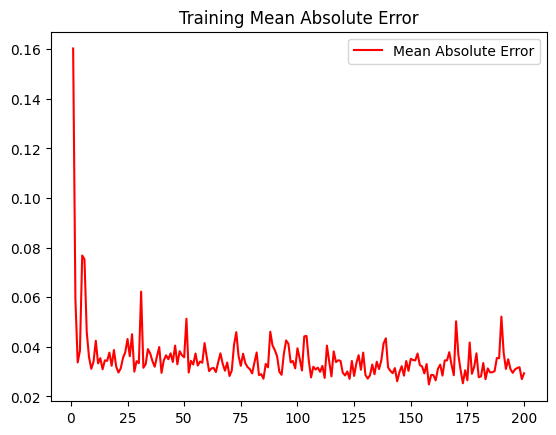

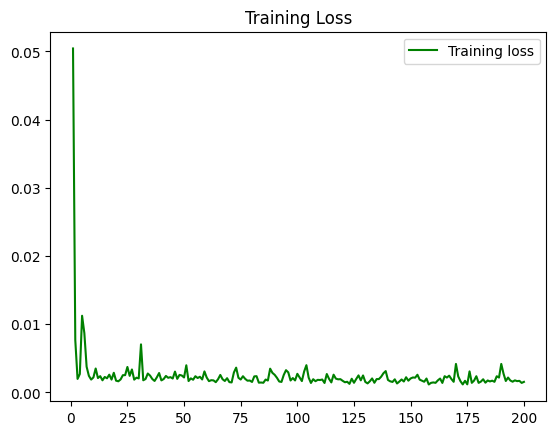

In [ ]:
mae=stock_price_predictor.history.history['mean_absolute_error']
loss=stock_price_predictor.history.history['loss']
epochs=range(1,len(mae)+1)

import matplotlib.pyplot as plt

plt.plot(epochs,mae,'r',label='Mean Absolute Error')
plt.title('Training Mean Absolute Error')
plt.legend()
plt.show()
plt.plot(epochs,loss,'g',label='Training loss')
plt.title('Training Loss')
plt.legend()
plt.show()

#### TEST SET IMPLEMENTATION

In [ ]:
x_test =[]
for i in range( look_back_units, len(stocks_test)):
    x_test.append(stocks_test[i - look_back_units :i, 0])
x_test=np.array(x_test)
x_test_implemented=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
stocks_predicted = stock_price_predictor.predict(x_test_implemented)
stocks_predicted_rescaled = sc.inverse_transform(stocks_predicted)

1/1 [==============================] - 2s 2s/step


#### TEST SET VISUALIZATION

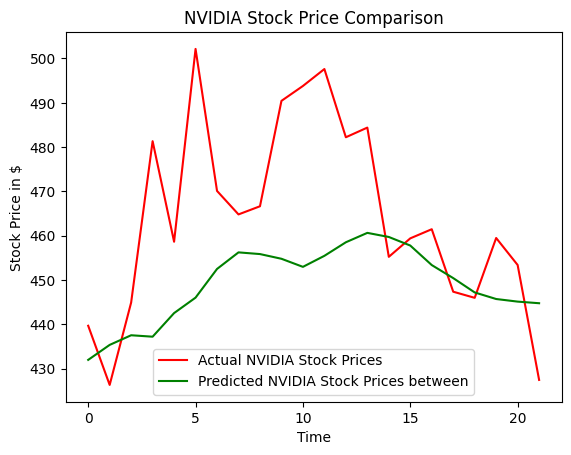

In [ ]:
stocks_test_rescaled = sc.inverse_transform(stocks_test)
plt.plot(stocks_test_rescaled[look_back_units:], color='r', label = 'Actual NVIDIA Stock Prices')
plt.plot(stocks_predicted_rescaled, color='g', label = 'Predicted NVIDIA Stock Prices between')
plt.title('NVIDIA Stock Price Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price in $')
plt.legend()
plt.show()

#### TEST SET RESULTS

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicted_values = np.array(np.round(stocks_predicted_rescaled, 6)).tolist()
stocks_test_array = np.array(stocks_test_rescaled)
deliminated_stocks_test_rescaled = stocks_test_array[look_back_units:]
df = pd.DataFrame({'Day' : np.arange(1,len(stocks_test_rescaled)+1-look_back_units,1).tolist(),'Actual Stock Price': deliminated_stocks_test_rescaled.tolist() , 'Predicted Stock Price': predicted_values})
print ('\n')
print(df)
print('\nThe Mean Absolute Error is : ' + str(mean_absolute_error (deliminated_stocks_test_rescaled, stocks_predicted_rescaled)))
print('\nThe Mean Squared Error is : ' + str(mean_squared_error (deliminated_stocks_test_rescaled, stocks_predicted_rescaled)))
print('\nThe R2 Score is : ' + str(r2_score (deliminated_stocks_test_rescaled, stocks_predicted_rescaled)))



    Day    Actual Stock Price Predicted Stock Price
0     1          [439.700012]   [431.9991149902344]
1     2  [426.35000599999995]  [435.38092041015625]
2     3          [444.940002]  [437.55621337890625]
3     4  [481.35000600000006]  [437.23126220703125]
4     5          [458.660004]   [442.5559387207031]
5     6          [502.160004]    [446.045166015625]
6     7          [470.119995]    [452.515869140625]
7     8          [464.820007]    [456.255615234375]
8     9          [466.660004]   [455.8735656738281]
9    10          [490.440002]      [454.8115234375]
10   11          [493.799988]  [452.98822021484375]
11   12          [497.619995]    [455.476318359375]
12   13  [482.23001099999993]   [458.5364990234375]
13   14  [484.41000399999996]  [460.65618896484375]
14   15              [455.25]   [459.7311096191406]
15   16          [459.420013]    [457.797607421875]
16   17          [461.480011]      [453.3935546875]
17   18          [447.380005]    [450.450439453125]
18   19  [

#### SAVING THE MODEL

In [ ]:
stock_price_predictor.save("/content/drive/MyDrive/Colab Notebooks/Projects for Show/Bharat Intern/Stock Price/nvidia_stock_price_predictor.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### PREDICTING THE WHOLE STOCK PRICE DATA

In [ ]:
predictor_model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Projects for Show/Bharat Intern/Stock Price/nvidia_stock_price_predictor.h5")

In [ ]:
input =[]
for i in range( look_back_units, len(stock_price_scaled)):
    input.append(stock_price_scaled[i - look_back_units :i, 0])
input=np.array(input)
input_implemented=np.reshape(input,(input.shape[0], input.shape[1], 1))
output_predicted = predictor_model.predict(input_implemented)
output_predicted_rescaled = sc.inverse_transform(output_predicted)

8/8 [==============================] - 1s 6ms/step


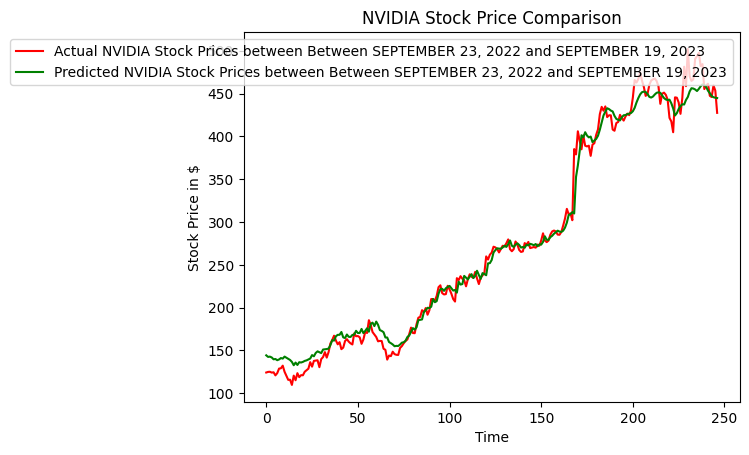

In [ ]:
plt.plot(stock_price_raw[look_back_units:], color='r', label = 'Actual NVIDIA Stock Prices between Between SEPTEMBER 23, 2022 and SEPTEMBER 19, 2023')
plt.plot(output_predicted_rescaled, color='g', label = 'Predicted NVIDIA Stock Prices between Between SEPTEMBER 23, 2022 and SEPTEMBER 19, 2023')
plt.title('NVIDIA Stock Price Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price in $')
plt.legend()
plt.show()

In [ ]:
predicted_whole = np.array(np.round(output_predicted_rescaled, 6)).tolist()
initial_stocks = stock_price_raw[look_back_units:]
df = pd.DataFrame({'Day' : np.arange(1,len(stock_price_raw)+1-look_back_units,1).tolist(),'Actual Stock Price': initial_stocks.tolist() , 'Predicted Stock Price': predicted_whole})
print ('\n')
print(df)
print('\nThe Mean Absolute Error is : ' + str(mean_absolute_error (initial_stocks, output_predicted_rescaled)))
print('\nThe Mean Squared Error is : ' + str(mean_squared_error (initial_stocks, output_predicted_rescaled)))
print('\nThe R2 Score is : ' + str(r2_score (initial_stocks, output_predicted_rescaled)))



     Day Actual Stock Price Predicted Stock Price
0      1       [124.199997]  [144.27273559570312]
1      2       [124.910004]  [142.41200256347656]
2      3           [125.07]  [142.75877380371094]
3      4       [124.099998]  [141.77560424804688]
4      5       [124.480003]  [139.63613891601562]
..   ...                ...                   ...
242  243       [447.380005]    [450.450439453125]
243  244            [446.0]  [447.21722412109375]
244  245            [459.5]   [445.7329406738281]
245  246       [453.410004]   [445.1470947265625]
246  247       [427.480011]  [444.78289794921875]

[247 rows x 3 columns]

The Mean Absolute Error is : 10.038964508955118

The Mean Squared Error is : 194.1343534915277

The R2 Score is : 0.9870061096175199
